#Embedding, LSTM, GRU and Conv1D
Cognitive Systems for Health Technology Applications
8.3.2019, Sakari Lukkarinen
Helsinki Metropolia University of Applied Sciences

Objectives
The aim of this Notebook is to show how to use keras embedding layers together with LSTM, GRU and Conv1D layers to classify review converted to sequences.

The examples are following the structure given in book: Chollet, Deep Learning with Python, Ch. 6. Deep learning for text and sequences. The examples are not optimized but the aim is to show how to configure the model architectures.

#Data preparation

In [44]:
# Import librarys what we are needed in this case3
import numpy as np # linear algebra
import pandas as pd # data processing

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

import os
print(os.listdir("../../case3_datas"))


['drugsComTest_raw.csv', 'drugsComTrain_raw.csv']


In [45]:
# Create dataframes train and test
test = pd.read_csv(r"../../case3_datas/drugsComTest_raw.csv")
train = pd.read_csv(r"../../case3_datas/drugsComTrain_raw.csv")
print(train)

        uniqueID                            drugName  \
0         206461                           Valsartan   
1          95260                          Guanfacine   
2          92703                              Lybrel   
3         138000                          Ortho Evra   
4          35696            Buprenorphine / naloxone   
5         155963                              Cialis   
6         165907                      Levonorgestrel   
7         102654                        Aripiprazole   
8          74811                              Keppra   
9          48928  Ethinyl estradiol / levonorgestrel   
10         29607                          Topiramate   
11         75612                      L-methylfolate   
12        191290                             Pentasa   
13        221320                    Dextromethorphan   
14         98494                           Nexplanon   
15         81890                         Liraglutide   
16         48188                        Trimetho

In [61]:
# Create labels based on the original article: Grässer et al. (2018)
r = train['rating']
labels = -1*(r <= 4) + 1*(r >= 7)
# Add the label column to the data
train['label'] = labels
# Check the new data
print(train)

        uniqueID                            drugName  \
0         206461                           Valsartan   
1          95260                          Guanfacine   
2          92703                              Lybrel   
3         138000                          Ortho Evra   
4          35696            Buprenorphine / naloxone   
5         155963                              Cialis   
6         165907                      Levonorgestrel   
7         102654                        Aripiprazole   
8          74811                              Keppra   
9          48928  Ethinyl estradiol / levonorgestrel   
10         29607                          Topiramate   
11         75612                      L-methylfolate   
12        191290                             Pentasa   
13        221320                    Dextromethorphan   
14         98494                           Nexplanon   
15         81890                         Liraglutide   
16         48188                        Trimetho

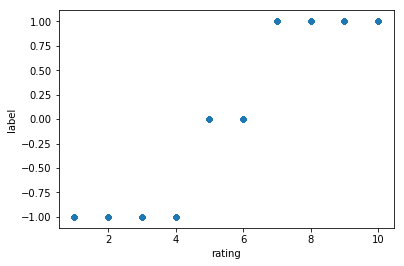

In [47]:
# Check ratings to labels conversion
import matplotlib.pyplot as plt
train.plot(x = 'rating', y = 'label', kind = 'scatter')
plt.show()


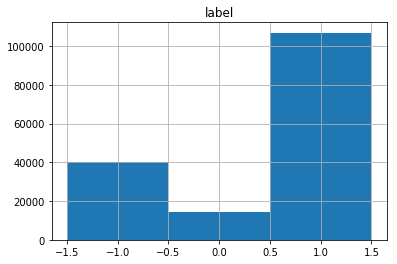

In [48]:

# Plot distribution of labels
train.hist(column = 'label', bins = np.arange(-1, 3), align = 'left');

# Convert reviews to padded sequences

In [49]:

# Read a part of the reviews and create training sequences (x_train)
samples = train['review'].iloc[:10000]
tokenizer = Tokenizer(num_words = 1000)
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)
x_train = pad_sequences(sequences, maxlen = 500)

# Convert labels to one-hot-categories

In [50]:

# Convert the labels to one_hot_category values
one_hot_labels = to_categorical(labels[:10000], num_classes = 3)

# Check the shapes

In [51]:
# Check the training and label sets
x_train.shape, one_hot_labels.shape

((10000, 500), (10000, 3))

In [52]:
# We use the same plotting commands several times, so create a function for that purpose
def plot_history(history):
    
    f, ax = plt.subplots(1, 2, figsize = (16, 7))
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.sca(ax[0])
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.sca(ax[1])
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

In [56]:
# Similarly create a function for model training, for demonstration purposes we use constant values
def train_model(model, x, y, e = 10, bs = 32, v = 1, vs = 0.25):
    h = model.fit(x, y, epochs = e, batch_size = bs, verbose = v, validation_split = vs)
    return h

In [57]:

# First model: Embedding layer -> Flatten -> Dense classifier
m0 = Sequential()
m0.add(Embedding(1000, 64, input_length = 500)) # 1000 = num_words, 64 = Embedding layers, 500 = sequence length
m0.add(Flatten())
m0.add(Dense(32, activation = 'relu'))
m0.add(Dense(3, activation = 'softmax'))
m0.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['acc'])
m0.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 500, 64)           64000     
_________________________________________________________________
flatten_7 (Flatten)          (None, 32000)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1024032   
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 99        
Total params: 1,088,131
Trainable params: 1,088,131
Non-trainable params: 0
_________________________________________________________________


Train on 7500 samples, validate on 2500 samples
Epoch 1/10
7500/7500 [==============================] - 5s 644us/step - loss: 0.8304 - acc: 0.6604 - val_loss: 0.7694 - val_acc: 0.7204
Epoch 2/10
7500/7500 [==============================] - 4s 591us/step - loss: 0.5852 - acc: 0.7829 - val_loss: 0.6885 - val_acc: 0.7360
Epoch 3/10
7500/7500 [==============================] - 4s 593us/step - loss: 0.4111 - acc: 0.8453 - val_loss: 0.7453 - val_acc: 0.7296
Epoch 4/10
7500/7500 [==============================] - 4s 595us/step - loss: 0.2520 - acc: 0.9105 - val_loss: 0.9176 - val_acc: 0.7228
Epoch 5/10
7500/7500 [==============================] - 4s 596us/step - loss: 0.1306 - acc: 0.9595 - val_loss: 1.1064 - val_acc: 0.7036
Epoch 6/10
7500/7500 [==============================] - 4s 590us/step - loss: 0.0612 - acc: 0.9841 - val_loss: 1.4000 - val_acc: 0.6976
Epoch 7/10
7500/7500 [==============================] - 4s 587us/step - loss: 0.0289 - acc: 0.9921 - val_loss: 1.7082 - val_acc: 0.6984


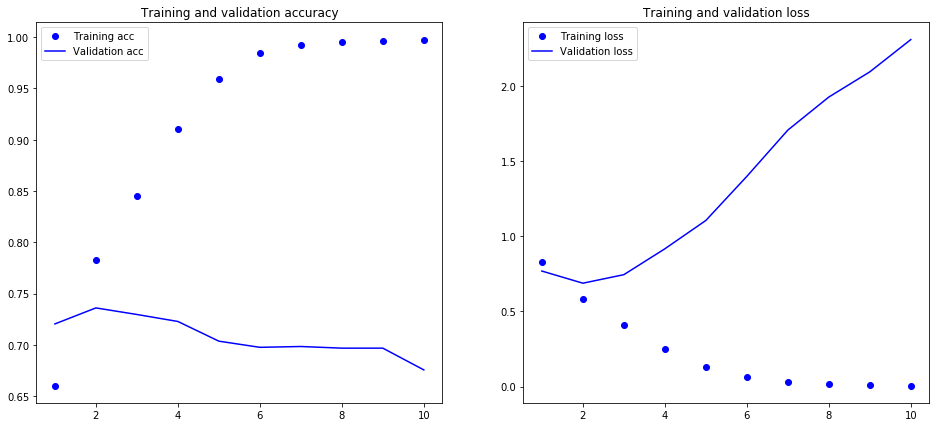

In [58]:
# Train the first model and plot the history
h0 = train_model(m0, x_train, one_hot_labels)
plot_history(h0)